# Отчет об исследовании рынка парфюмерии
## Анализ построен на основе данных с сайта randewoo.ru, специализирующимся на парфюмерии
#### Описание
**Данный проект заключается в анализе рынка парфюмерии на основе данных с сайта магазина randewoo.ru, специализирующимся на парфюмерии**




In [221]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import time
import random
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
import numpy as np
from IPython.display import HTML, clear_output, display

## Загрузка данных

Для начала необходимо собрать датасет, для этого был написан код с помощью библиотек requests и BeautifulSoup, а также еще нескольких вспомогательных для реализации сбора данных

**Замечание:** программа выполнялась очень долго, загрузка длилась около 19 часов, иногда ломалась и нужно было начинать сначала. Данная версия кода работала и загрузила 82% данных, после чего зависла, но так как данные с каждой страницы сразу загружались в файл, то необходимо было просто запустить код с той страницы, на котоой он завис. Так что загрузка происходила в два этапа, но тем не менее датасет был собран

In [249]:
with open('perfume_test.csv', 'w', encoding='utf-8', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Name", "Brand", "Type", "Price", "Rating", "Review", "Year", "Sex", "Group", "Notes", "High notes", "Middle notes", "Base notes", "Perfumer", "Country", "Event"])

In [1]:
with open('perfume_data.csv', 'w', encoding='utf-8', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Name", "Brand", "Type", "Price", "Rating", "Review", "Year", "Sex", "Group", "Notes", "High notes", "Middle notes", "Base notes", "Perfumer", "Country", "Event"])
URL = "https://randewoo.ru/category/parfyumeriya"
headers = {"User-Agent": "",  # User-Agent вставьте из браузера
           "Cookie": "".encode("utf-8")}  # Cookie вставьте из браузера
headers_catalog = {"User-Agent": "",  # User-Agent вставьте из браузера
           "Cookie": "".encode("utf-8")}  # Cookie вставьте из браузера

session = requests.Session()


def url_f(catalog_url, year, sex, group, note, high_note, middle_note, base_note, perfumer, country, event): # функция для нахождения инфы на страничке самого аромата

    try:
        resp = session.get(catalog_url, headers=headers_catalog)

        soup = BeautifulSoup(resp.text, "lxml")

        info_perfume = soup.find("div", class_="small-tabs__box")
        if info_perfume is not None:
            items_info = info_perfume.select('dl.dl > div')
            data = {}
            for item in items_info:
    # Извлекаем текст из span внутри dt
                theme_text = item.find('span').text
    
    # Извлекаем текст из dd (игнорируем лишние символы)
                info_text = item.find('dd').text
    
    # Записываем в словарь
                data[theme_text] = info_text
        
            year = data.get('Год создания', '')
            sex = data.get('Пол', '')
            group = data.get('Группы', '')
            note = data.get('Ноты', '')
            high_note = data.get('Верхние ноты', '')
            middle_note = data.get('Средние ноты', '')
            base_note = data.get('Базовые ноты', '')
            perfumer = data.get('Парфюмер', '')
            country = data.get('Страна', '')
            event = data.get('Для какого события', '')
    

    

    

# brand = data.get('Бренд', 'Не указано')
    
    
    
        return catalog_url, year, sex, group, note, high_note, middle_note, base_note, perfumer, country, event
    except Exception as e:
        print(f"Ошибка при обработке {catalog_url}: {e}")
        return catalog_url, year, sex, group, note, high_note, middle_note, base_note, perfumer, country, event

for i in tqdm(range(244, 298), mininterval=10):
    items_found = []
    try:
        params = {"page": f"{i+1}"}
    
        resp = session.get(URL, params=params, headers=headers)

        soup = BeautifulSoup(resp.text, "lxml")

        all_items = soup.find_all("div", class_="products__innerLink")
#    if i == 0:
       # all_items = all_items[11:]  # 11: , чтобы избавиться от первых 11 промо-айтемов
    



        for sample_item in all_items:
            try:
                price_container = sample_item.find("div", class_="products__price")

                if price_container is not None:
                    product_price = price_container.find("b").text
                else:
                    product_price = ''

        #span_container = sample_item.find("div", class_="_3iCDs aP0JE").find("span", class_="ds-valueLine DPiFo") #ds-valueLine ds-valueLine_gap_2
        
        
        
                info_container = sample_item.find("a", class_="b-catalogItem__descriptionLink s-link s-link--unbordered")
                if info_container is not None:
            
                    brand_name = info_container.find("div", class_="b-catalogItem__brand")
                    if brand_name is not None:
                        brand_name = brand_name.text
                    else:
                        brand_name = ''
                # print(brand_name)

        
                    product_name = info_container.find("div", class_="b-catalogItem__name s-link s-link--unbordered js-product-follow")
                    if product_name is not None:
                        product_name = product_name.text
                    else:
                        product_name = ''
                #print(product_name)

            
                    product_type = info_container.find("small", class_="products__hint")
                    if product_type is not None:
                        product_type = product_type.text
                    else:
                        product_type = ''
                    #print(product_type)
                else:
                    brand_name = ''
                    product_name = ''
                    product_type = ''

            
                rating_container = sample_item.find("div", class_="b-catalogProductRating")
                
                if rating_container is not None:
                    rating = rating_container.find("div", class_="s-rating s-rating--static")
                    if rating is not None:
                        rating = rating.get("data-rating-value")
                    else:
                        rating = ''
                #print(rating)
         
                    n_rates = rating_container.find("span", "b-catalogProductRating__reviewsCount")
                    if n_rates is not None:
                        n_rates = n_rates.text[1:-1]
                    else:
                        n_rates = ''
                #print(n_rates)
                else:
                    rating = ''
                    n_rates = ''

            
                catalog_container = sample_item.find("a", class_="b-catalogItem__photoWrap js-product-follow")
                if catalog_container is not None:
                    catalog_url = 'https://randewoo.ru/' + catalog_container.get('href')
                    year = ''
                    sex = ''
                    group = ''
                    note = ''
                    high_note = ''
                    middle_note = ''
                    base_note = ''
                    perfumer = ''
                    country = ''
                    event = ''
                    catalog_url, year, sex, group, note , high_note, middle_note, base_note, perfumer, country, event= url_f(catalog_url, year, sex, group, note, high_note, middle_note, base_note, perfumer, country, event)
            
            
            
                items_found.append((product_name, brand_name, product_type, product_price, rating, n_rates, year, sex, group, note, high_note, middle_note, base_note, perfumer, country, event))
            except Exception as e:
                print(f"Ошибка при обработке элемента {i+1}: {e}")
                continue
            
            
        with open('perfume_data.csv', 'a', encoding='utf-8', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerows(items_found)
                
        time.sleep(random.uniform(27, 51))      

    except Exception as e:
        print(f"Ошибка при загрузке страницы {i+1}: {e}")
        continue
            
        # 
        



100%|███████████████████████████████████████████████████████████████████████████████| 54/54 [3:28:46<00:00, 231.97s/it]


## Обработка и очистка данных

Датасет был обработан, удалены дубликаты, числовые переменные изменены, данные записанные через запитую переведены в список. Также в том случае, если цена была указана через тире, то просто оставалась максимальная цена. И данные были описаны с помощью функции describe, чтобы посмотреть что они из себя представляют

In [223]:

# обрабатываем датасет, чтобы сделать его пригодным для исследования


df = pd.read_csv('perfume_data.csv', encoding='utf-8') # создаем датасет

df = df.drop_duplicates() # удаляем дублткаты строк, если они есть

df['Price'] = df['Price'].str.split(' – ').str[-1] # делаем так,чтобы оставалась только одна цена
df['Price'] = df['Price'].str.replace(' ', '').astype(int,  errors='ignore') # делаем числами
df['High notes'] = df['High notes'].str.split(', ')
df['Middle notes'] = df['Middle notes'].str.split(', ')
df['Base notes'] = df['Base notes'].str.split(', ')
df['Notes'] = df['Notes'].str.split(', ')
df['Group'] = df['Group'].str.split(', ')
df['Perfumer'] = df['Perfumer'].str.split(', ')

# разделяем данные о нотах, чтобы использовать ноты отдельно
# а также о группе аромата и парфюмерах, если вдруг один аромат делало несколько парфюмеров
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Review'] = pd.to_numeric(df['Review'], errors='coerce')
# делаем значения о годе выпуска, рейтинге и количестве отзывов числовыми

print(df.describe(include='all')) # описываем данные


              Name     Brand              Type  Price        Rating  \
count        15910     15911             15845  13573  10781.000000   
unique       14763      1125                29   4150           NaN   
top     Pour Homme  Guerlain  Парфюмерная вода   9363           NaN   
freq            24       221              9120     88           NaN   
mean           NaN       NaN               NaN    NaN      4.890455   
std            NaN       NaN               NaN    NaN      0.397216   
min            NaN       NaN               NaN    NaN      0.000000   
25%            NaN       NaN               NaN    NaN      5.000000   
50%            NaN       NaN               NaN    NaN      5.000000   
75%            NaN       NaN               NaN    NaN      5.000000   
max            NaN       NaN               NaN    NaN      5.000000   

              Review          Year      Sex                   Group  \
count   10781.000000  15007.000000    15834                   15381   
uniqu

Описание данных дает понимания о том какие они. Мы можем обратить внимание, что средний рейтинг всех ароматов 4.89 или что чаще всего аромат изготовлен во Франции, или что чаще всего из парфюмеров встречается Alberto Morillas. Но подробнее будем проводить аналитику в ходе проекта

## Анализ данных и визуализация
### Гистограмма стоимости парфюма
Для начала построим гистограмму для того, чтобы посмотреть распределение цен, а также выведем 10 самых дорогих парфюмов

<Figure size 640x480 with 0 Axes>

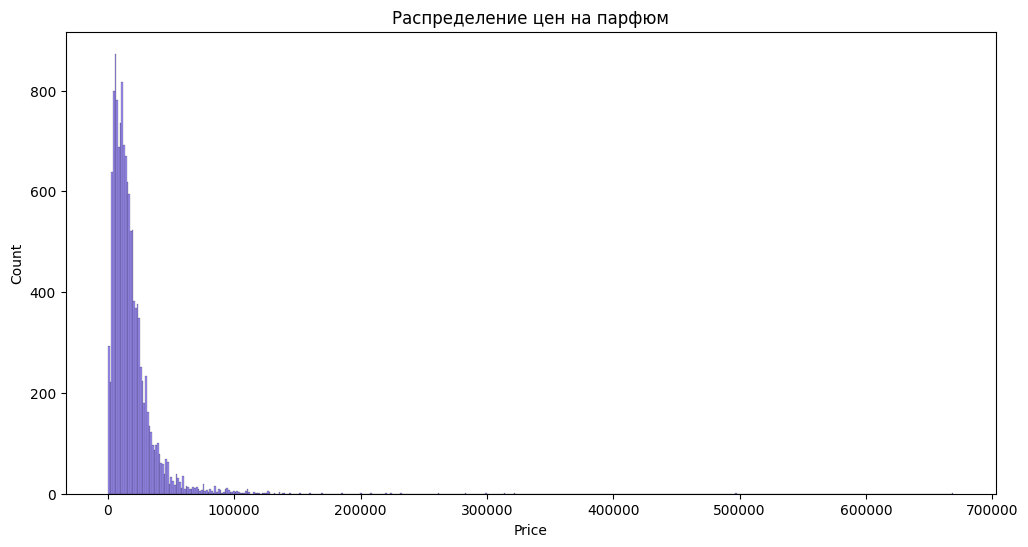

                    Name                    Brand     Price
10977          The Night           Frederic Malle  669130.0
4384   No5 Parfum Винтаж                   Chanel  497280.0
7186                Dawn           Frederic Malle  321860.0
7862       Paname Palace                Ex Nihilo  313390.0
10456   A Goodnight Kiss                Roja Dove  298870.0
11677      Lost In Paris                Roja Dove  283140.0
8015       Rouge Bonheur                 Guerlain  261800.0
158              Aventus                    Creed  232078.0
10026          Pur Ambre            Louis Vuitton  224000.0
8061                Opal  Boadicea The Victorious  220220.0


In [224]:

''' гистограмма стоимости парфюма'''
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
# до этого делали данные числовыми, но чтобы построить гистограмму нужно сделать из numeric
df_clean_price = df.dropna(subset=['Price'])

plt.clf()
plt.figure(figsize=(12,6))
sns.histplot(data=df_clean_price, x='Price', bins=500, color='mediumslateblue')
plt.title('Распределение цен на парфюм')
plt.show()

# выведем 10 самых дорогих
print(df.nlargest(10, 'Price')[['Name', 'Brand', 'Price']])

Самый дорогой парфюм стоит 699 130 руб., все парфюмы из топа стоят больше 200 тыс.руб. Также по графику видно, что в основном стоимость продуктов парфюмерии до 100тыс.руб., для того, чтобы точнее рассмотреть это распределение, удалим выбросы

### Гистограмма стоимости парфюма (очищенная от выбросов)

<Figure size 640x480 with 0 Axes>

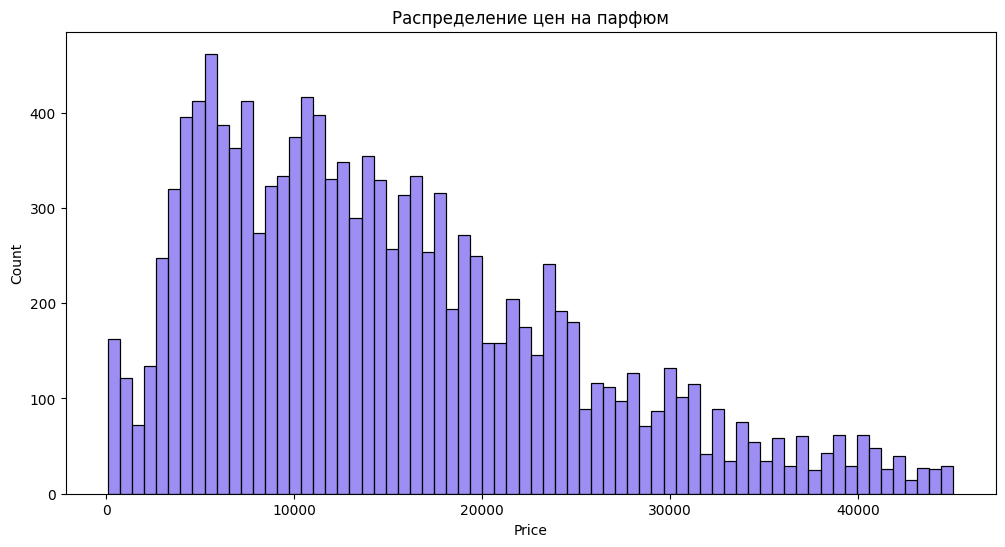

In [226]:
# считаем межквартильный размах, чтобы очистиить данные
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df['Price'] < (Q1 - 1.5*IQR)) | (df['Price'] > (Q3 + 1.5*IQR)))].copy()
# строим график

df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
# до этого делали данные числовыми, но чтобы построить гистограмму нужно сделать их numeric
df_clean_price = df_filtered.dropna(subset=['Price'])

plt.clf()
plt.figure(figsize=(12,6))
sns.histplot(data=df_clean_price, x='Price', bins=70, color='mediumslateblue')
plt.title('Распределение цен на парфюм')
plt.show()


на графике после удаления выбросов остались данные в пределедо чуть меньше чем 50 тыс.руб., в частности очень выскоий уровень в пределе от 5 до 15 тыс.руб. с небольшим просадком в районе 8-9 тыс.руб.

### График распределения ароматов по полу
Построим график, чтобы посмотреть какое распределение ароматов по полу существует на рынке парфюмерии

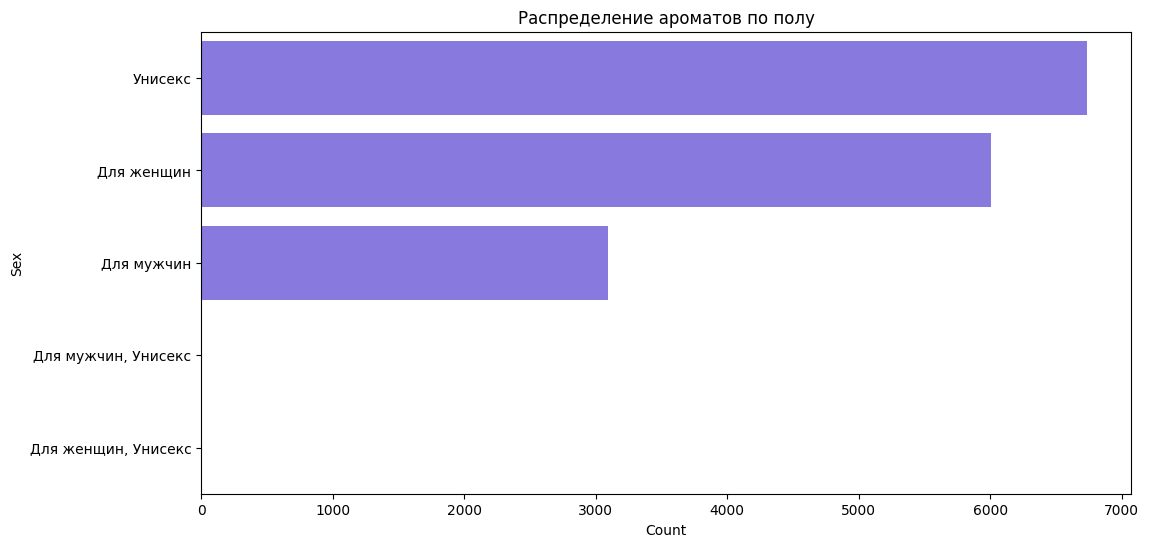

In [227]:
'''график, показывающий распределение ароматов по полу'''
sex_counts = df['Sex'].value_counts().reset_index() # создаем отдельный датасет для того, чтобы туда записать пол и частоту
sex_counts.columns = ['Sex', 'Count'] # переименуем столбцы

sex = sex_counts.sort_values('Count', ascending=False) # делаем так, чтобы сверху были наибольшие значения
plt.figure(figsize=(12,6))
sns.barplot(data=sex, x='Count', y='Sex', color='mediumslateblue')
plt.title('Распределение ароматов по полу')
plt.show()

На графике видно, что больше всего на рынке представлено унисекс ароматов, а количество женских ароматов значительно (в два раза) превосходит количество мужских. Также есть графы тех ароматов, которые изначально женские/мужские, но могут быть использованы и как унисекс, столбца почти не видно, так что данные были отсмотрены вручную, таких ароматов представлено из каждой категории всего по 2-3 штуки

### График распределения ароматов по событиям

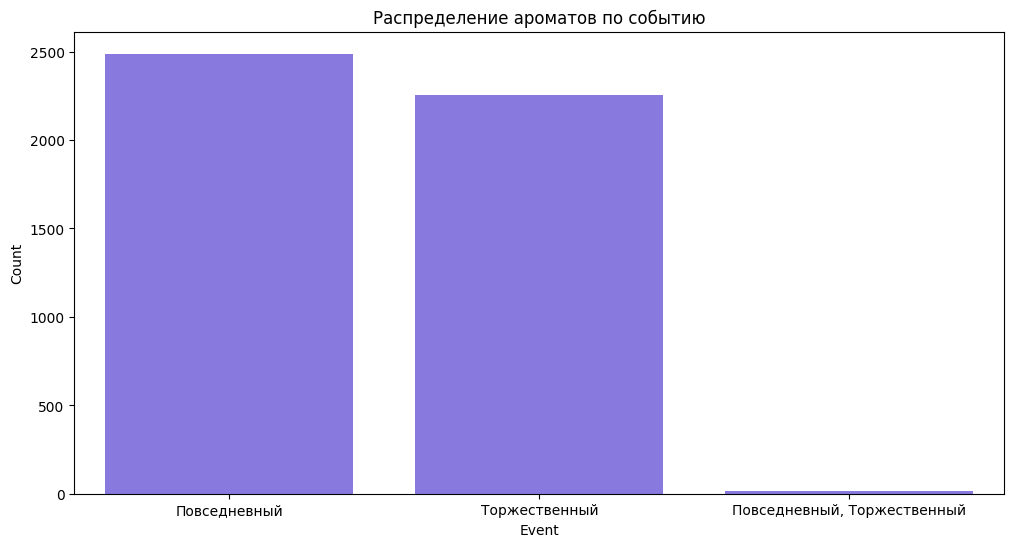

In [228]:
'''график, показывающий распределение ароматов по событию, для которого этот аромат'''
event_counts = df['Event'].value_counts().reset_index() # создаем отдельный датасет для того, чтобы туда записать событие и частоту
event_counts.columns = ['Event', 'Count'] # переименуем столбцы

event = event_counts.sort_values('Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=event, x='Event', y='Count', color='mediumslateblue')
plt.title('Распределение ароматов по событию')
plt.show()

График показывает, что большинство представленных ароматов предназначены для повседневного ношения, ароматы, созданные для торжественных случаев, распространены совсем немного меньше. Также существует небольшая категория ароматов, подходящих для обоих случаев

### График топ видов, в которых предствлены ароматы
Данный график покажет топ-7 форм, в которых представлены ароматы

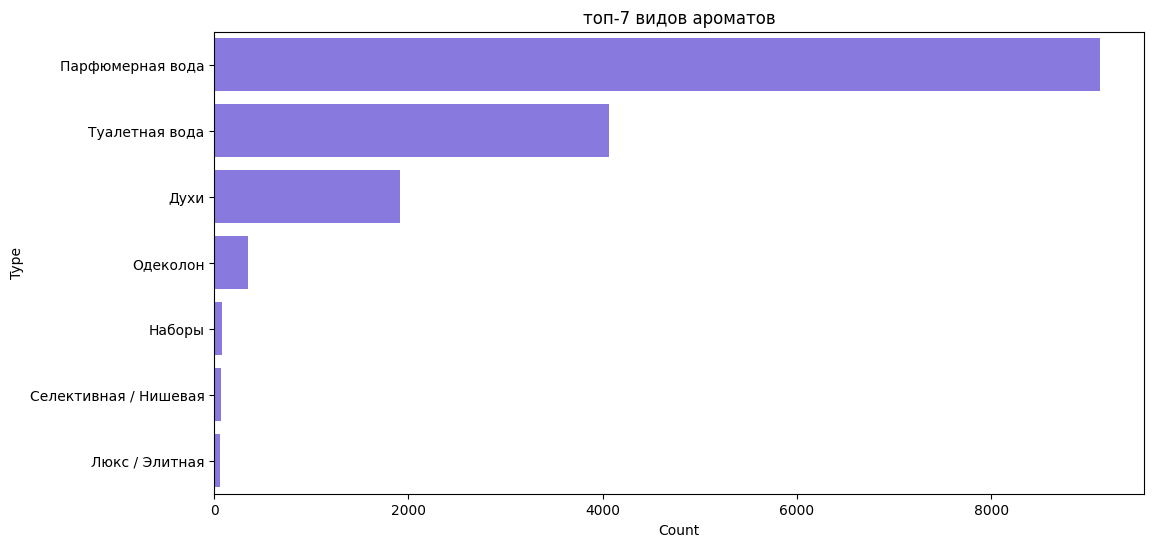

In [229]:
'''график, показывающий топ-7 видов, в которых продаются ароматы'''
type_counts = df['Type'].value_counts().reset_index() # создаем отдельный датасет для того, чтобы туда записать тип и частоту
type_counts.columns = ['Type', 'Count'] # переименуем столбцы

type_ = type_counts.sort_values('Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=type_.head(7), x='Count', y='Type', color='mediumslateblue')
plt.title('топ-7 видов ароматов')
plt.show()

Более половины рынка занимает парфюмерная вода, далее идут туалетная вода и духи, они занимают почти весь рынок. Также стоит обратить внимание на наборы, они хоть и занимают небольшую часть, относительно первых позиций, но довольно популярны и помогают ознакомиться сразу с несколькими ароматами.

### График топ-7 брендов с самым большим количеством ароматов


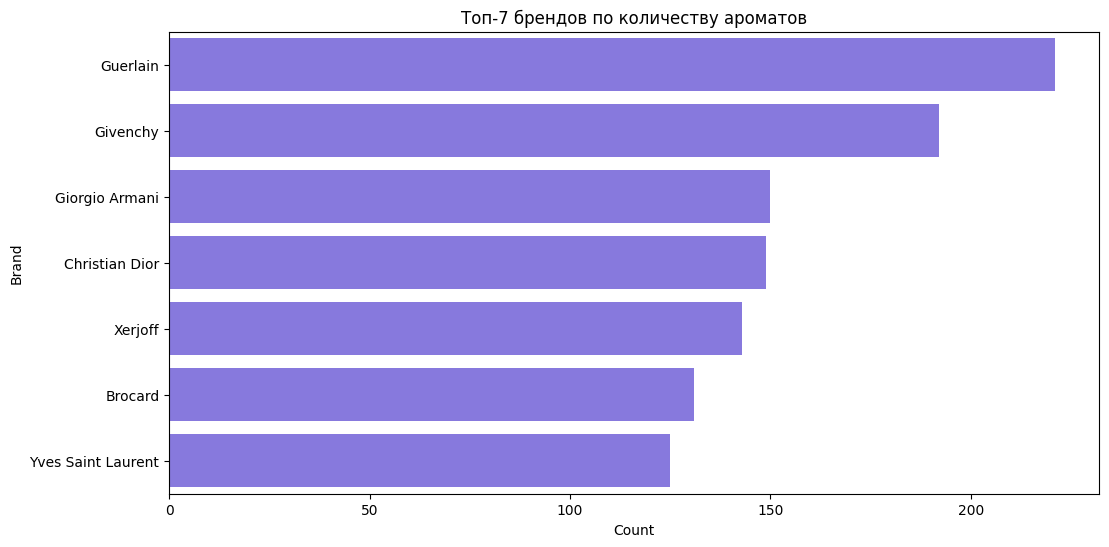

In [233]:
'''график, показывающий 7 брендов с самым большим количеством ароматов '''
brand_counts = df['Brand'].value_counts().reset_index() # создаем отдельный датасет для того, чтобы туда записать бренд и частоту
brand_counts.columns = ['Brand', 'Count'] # переименуем столбцы

top_brands = brand_counts.sort_values('Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=top_brands.head(7), x='Count', y='Brand', color='mediumslateblue')
plt.title('Топ-7 брендов по количеству ароматов')
plt.show()

Самую большую долю по количеству ароматов занимает Guerlain и  Givenchy

### График топ-7 брендов по цене аромата
Также построим график, чтобы найти бренды с самыми дорогими ароматами

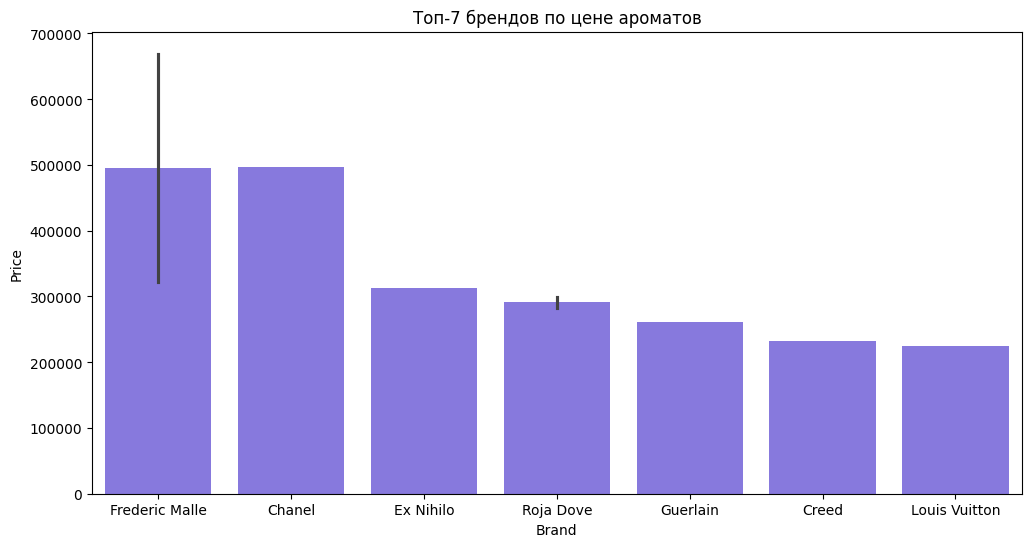

In [239]:
'''график, показывающий 7 брендов с самым большим количеством ароматов '''
brand_counts = df[['Brand', 'Price']] # создаем отдельный датасет для того, чтобы туда записать бренд и цену


top_brands = brand_counts.sort_values('Price', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=top_brands.head(9), x='Brand', y='Price', color='mediumslateblue')
plt.title('Топ-7 брендов по цене ароматов')
plt.show()


Самым дорогим брендом можно назвать Frederic Malle, Chanel также выпускает не самые бюджетные ароматы 

### График топ-20 стран по количеству парфюмерии
Проанализируем также страны производства продуктов прафюмерии, чтобы найти страны, лидирующие в производстве

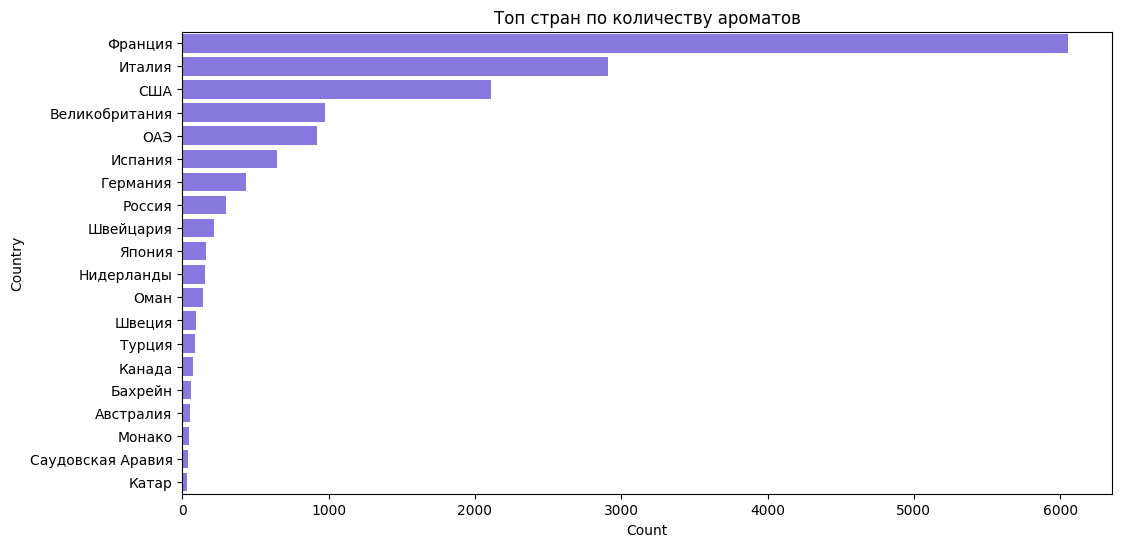

In [240]:
'''график, показывающий топ-20 стран по количеству парфюмерии'''
country_counts = df['Country'].value_counts().reset_index() # создаем отдельный датасет для того, чтобы туда записать страну и частоту
country_counts.columns = ['Country', 'Count'] # переименуем столбцы

top_country = country_counts.sort_values('Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=top_country.head(20), x='Count', y='Country', color='mediumslateblue')
plt.title('Топ стран по количеству ароматов')
plt.show()

По графику видно, что абсолютным лидером на рынке парфюмерии является Франция, в которой произведена почти половина всех ароматов. Также большая доля ароматов произведена в Италии и США

### График топ-15 групп ароматов в парфюмерии


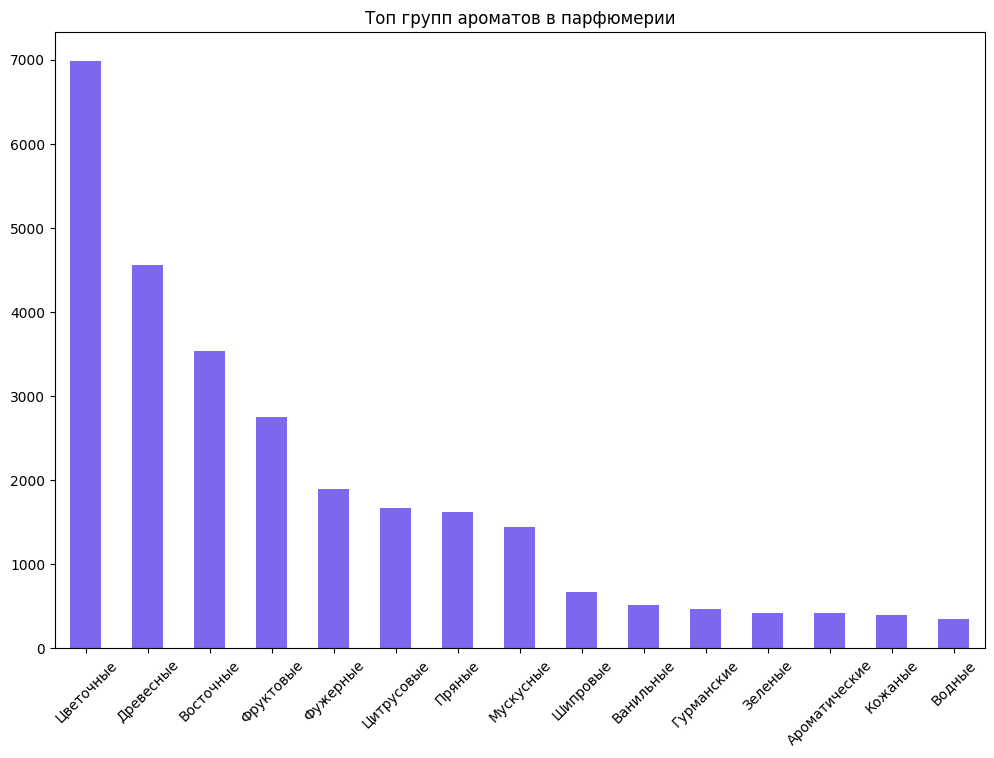

In [241]:
'''график, показывающий топ групп ароматов в парфюмерии'''
group_df = df['Group']
group = Counter([note for sublist in group_df.dropna() for note in sublist])

plt.figure(figsize=(12,8))
pd.Series(dict(group.most_common(15))).plot(kind='bar', color='mediumslateblue')
plt.xticks(rotation=45)
plt.title('Топ групп ароматов в парфюмерии')
plt.show()

Наиболее распространнеными являются ароматы цветочной группы, занимающие чуть меньше половины рынка, также в топ-5 входят древесные, восточные, фруктовые и фужерные ароматы

### Графики наиболее встречающихся нот в ароматах
В некоторых ароматах указаны верхние, средние и базовые ноты,а в некоторых они написаны без разделения, поэтому будет строиться график нот как по положению в аромате, так и общих

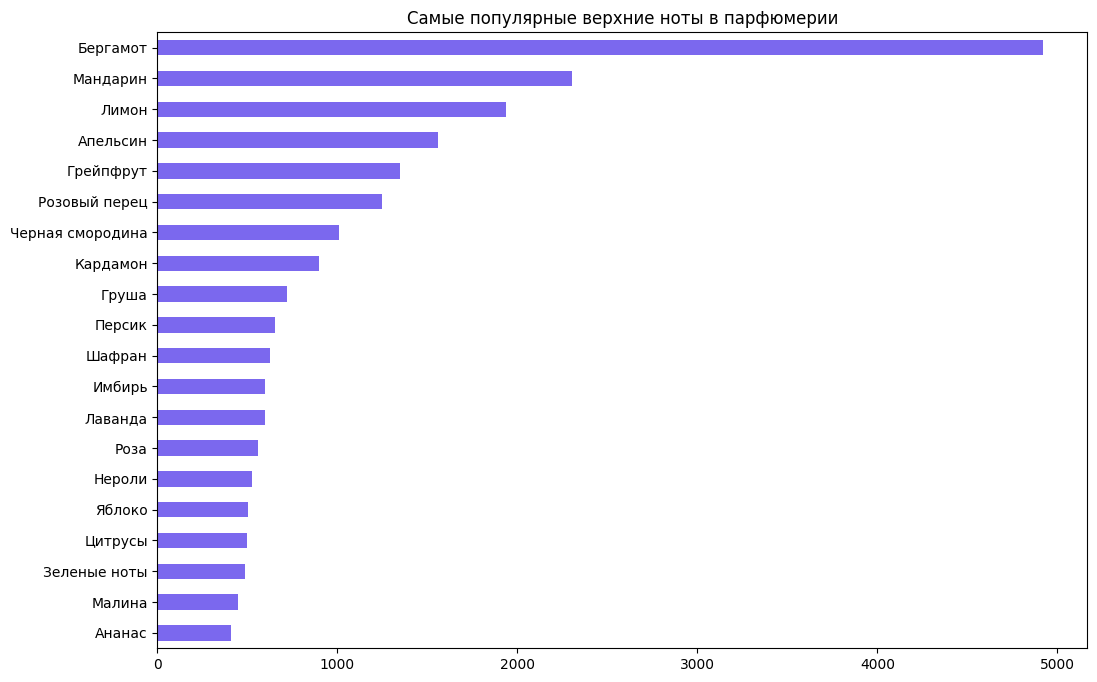

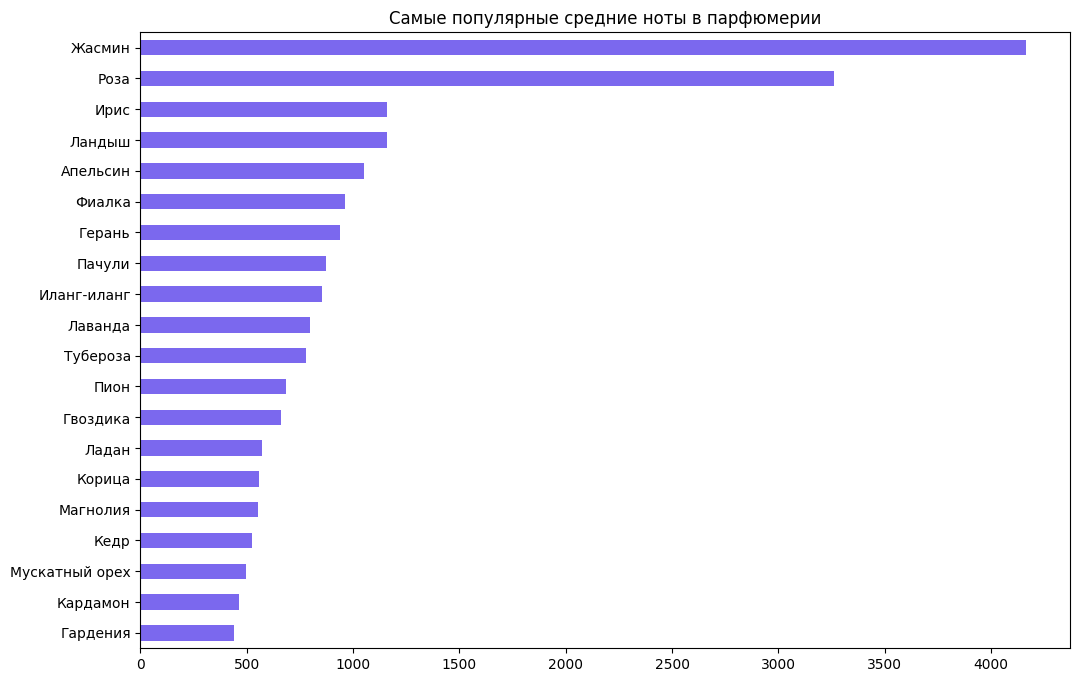

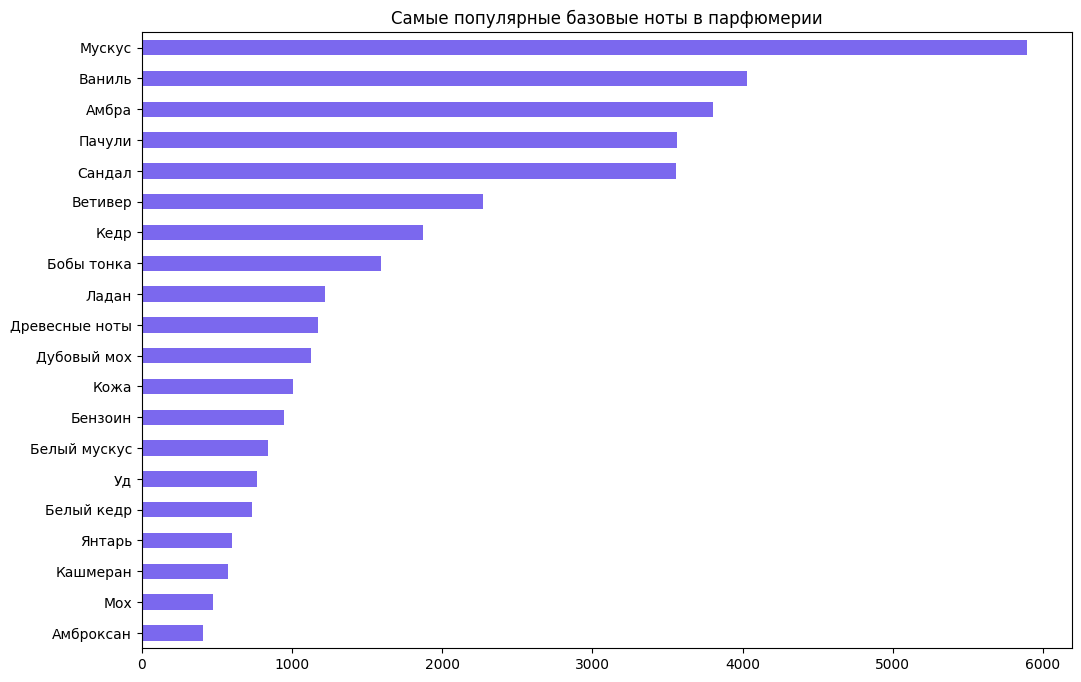

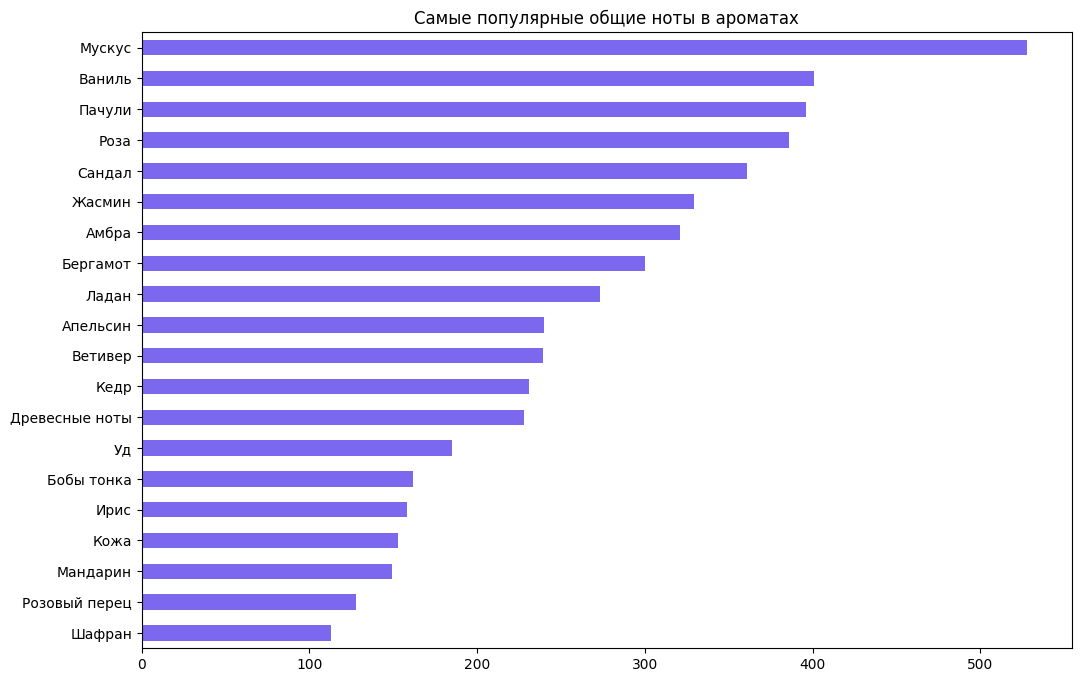

In [242]:
'''графики, показывающий 15 самых популярных верних, средних, базовых и обычных нот'''
# график для верхних нот
high_notes_df = df['High notes']
high_notes = Counter([note for sublist in high_notes_df.dropna() for note in sublist])

plt.figure(figsize=(12,8))
pd.Series(dict(high_notes.most_common(20))).plot(kind='barh', color='mediumslateblue')
plt.gca().invert_yaxis()
plt.title('Самые популярные верхние ноты в парфюмерии')
plt.show()

# график для средних нот
middle_notes_df = df['Middle notes']
middle_notes = Counter([note for sublist in middle_notes_df.dropna() for note in sublist])

plt.figure(figsize=(12,8))
pd.Series(dict(middle_notes.most_common(20))).plot(kind='barh', color='mediumslateblue')
plt.gca().invert_yaxis()
plt.title('Самые популярные средние ноты в парфюмерии')
plt.show()

# график для базовых нот
base_notes_df = df['Base notes']
base_notes = Counter([note for sublist in base_notes_df.dropna() for note in sublist])

plt.figure(figsize=(12,8))
pd.Series(dict(base_notes.most_common(20))).plot(kind='barh', color='mediumslateblue')
plt.gca().invert_yaxis()
plt.title('Самые популярные базовые ноты в парфюмерии')
plt.show()


# график для нот, когда у аромата не разделены они на виды
notes_df = df['Notes']
notes = Counter([note for sublist in notes_df.dropna() for note in sublist])

plt.figure(figsize=(12,8))
pd.Series(dict(notes.most_common(20))).plot(kind='barh', color='mediumslateblue')
plt.gca().invert_yaxis()
plt.title('Самые популярные общие ноты в ароматах')
plt.show()


**Топ-5 верхних нот:** бергамот, мандарин, лимон, апельсин, грейпфрут

Бергамот находится на первом месте с большим отрывом от остальных нот, являясь самой распространенной нотой

**Топ-5 средних нот:** жасмин, роза, ирис, ландыш, апельсин

Жасмин и роза встречаются чаще, чем остальные из топа, очень распространенные средние ноты

**Топ-5 базовых нот:** мускус, ваниль, амбра, пачули, сандал

Мускус также находится на первом месте с отрывом от остальных. в то время как топ-5 ароматов также распространены больше, чем остальные базовые ноты

**Топ-5 общих нот:** мускус, ваниль, пачули, роза, сандал

В общих нотах мускус также распространен сильнее отсальных нот

### Матрица корреляции между ценой, рейтингом и количеством отзывов
Необходимо также проанализировать корреляцию между числовыми переменными

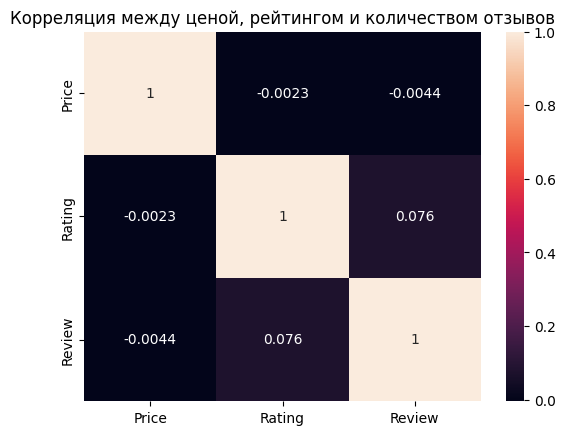

In [243]:
''' график '''
corr_matrix = df[['Price', 'Rating', 'Review']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляция между ценой, рейтингом и количеством отзывов')
plt.show()

Матрица показывет, что между переменными цены, рейтинга и количества отзывов почти отсутствует корреляция

### Топ-10 лучших парфюмеров

С помощью данных о количестве произведенных ароматов, рейтинге и цене ароматов найдем лучших парфюмеров

In [245]:
'''поиск лучших парфюмеров по данным по данным количества ароматов, рейтингу и цене'''
df_perfumer = df.explode('Perfumer')
perfumer_top = df_perfumer.groupby('Perfumer').agg({
    'Name': 'count',
    'Rating': 'mean',
    'Price': 'mean'
}).sort_values(['Name', 'Rating'], ascending=False) # сортируем в первую очередь по количеству созданных ароматов, далее по рейтингу
perfumer_top = perfumer_top.rename(columns={
    'Name': 'Количество ароматов',
    'Rating': 'Средний рейтинг',
    'Price': 'Средняя цена'
}) # переименуем стобцы для лучшего вида
perfumer_top = perfumer_top.head(10)

html_perfumer = perfumer_top.to_html(index=True)

display(HTML(html_perfumer))


,Количество ароматов,Средний рейтинг,Средняя цена
Perfumer,,,
Alberto Morillas,262,4.883413,20024.226496
Olivier Cresp,144,4.920833,16465.435484
Nathalie Lorson,141,4.881818,18776.475806
Francis Kurkdjian,132,4.883028,26601.228814
Dominique Ropion,131,4.930180,24274.500000
Jacques Cavallier,116,4.869318,26363.504950
Paolo Terenzi,112,4.950000,17176.710000
Francois Demachy,102,4.917614,28720.107143
Michel Almairac,92,4.876543,19054.597403


Данные парфюмеры являются одними из лучших среди создаталей ароматов

### График распрделения цен по десятилетиям
Посторим боксплот для цен по годам

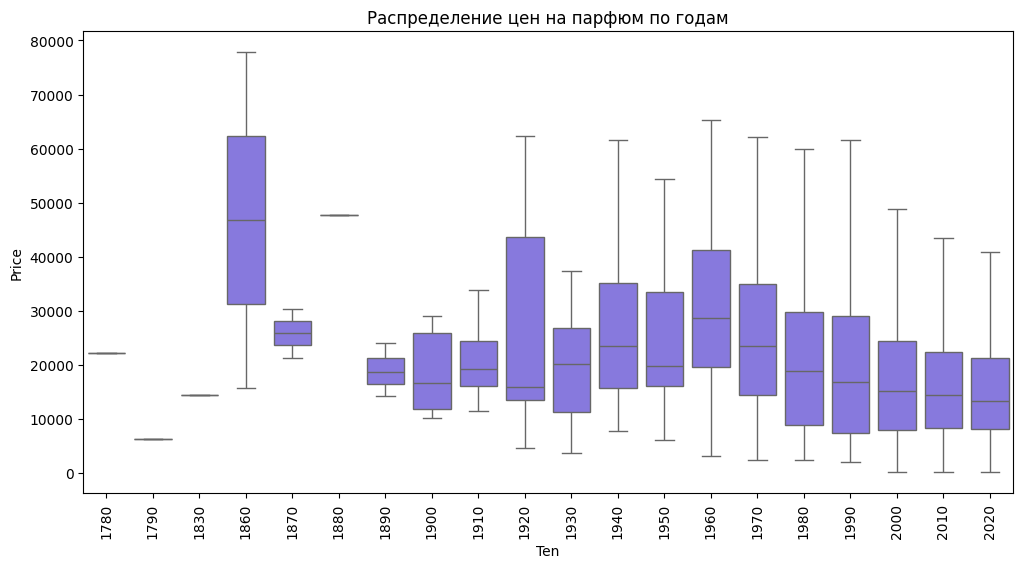

In [246]:

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_clean_year = df.dropna(subset=['Year', 'Price']).copy()

df_clean_year['Ten'] = (df_clean_year['Year'] // 10) * 10 # типо чтобы они десятками были
df_clean_year['Ten'] = df_clean_year['Ten'].astype(int)

plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean_year, x='Ten', y='Price', color='mediumslateblue', showfliers=False) # игнорируем выбросы, чтобы не захламлять график
plt.xticks(rotation=90) 
plt.title('Распределение цен на парфюм по годам')
plt.show()

График показывает, что наиболее дорогие ароматы те, которые были созданы в 1860-е, также видно, что цены на ароматы произведенные после 1960-х постепенно опускаются

### Матрица корреляции категориальных значений
Проанализируем данные о корреляции бренда, типа аромата, пола, страны и события

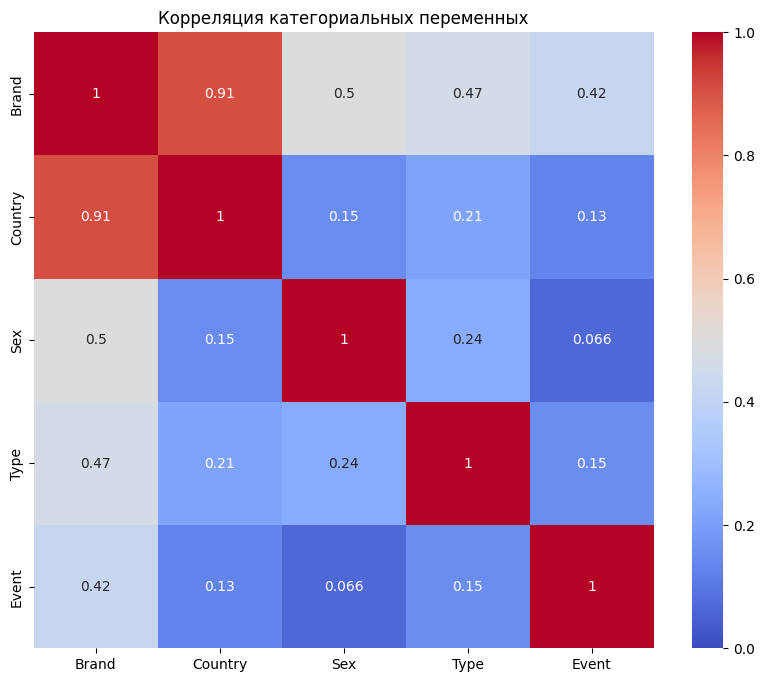

In [247]:
# Создаем матрицу корреляций
def cramers(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))
    # код взят из интернета, для вычисления корреляции по крамеру между категориальными переменными
    
categories = ['Brand', 'Country', 'Sex', 'Type', 'Event']
corr_matrix = pd.DataFrame(index=categories, columns=categories)


for col1 in categories:
    for col2 in categories:
        corr_matrix.loc[col1, col2] = cramers(df[col1], df[col2])

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Корреляция категориальных переменных")
plt.show()

На матрице видно, что между брендом и страной есть очень сильная корреляция, а также у бренда есть средняя корреляция с типом аромата, полом и чуть меньше с событием. 

Слабая корреляция есть и между типом аромата и событием, для которого он предназначен и между типом и полом. Слабая корреляция также присутстует между полом и страной производства аромата.

### Сравнение ароматов
Создадим возможность сравнения ароматов между собой

In [248]:
       
def perfume_vs():

# Ищем точное совпадение (регистрозависимо)
    while True:
        clear_output(wait=True) 
        perfume_name = input("Введите название аромата 1 (или no для выхода): ")
        if perfume_name.lower() == 'no':
            break
        
        perfume_name2 = input("Введите название аромата 2(или no для выхода): ")
        if perfume_name2.lower() == 'no':
            break

        perfume_info = df[df['Name'].str.strip().str.lower() == perfume_name.strip().lower()]
        perfume_info2 = df[df['Name'].str.strip().str.lower() == perfume_name2.strip().lower()]
        if perfume_info.empty:
            print(f"Аромат 1 '{perfume_name}' не найден.")
        elif perfume_info2.empty:
            print(f"Аромат 2 '{perfume_name2}' не найден.")     
    
        else:
    # Выводим всю информацию о найденном аромате
   # print(perfume_info.to_string(index=False))
            combined_info = pd.concat([perfume_info, perfume_info2])

            html = combined_info.to_html(index=False, border=2)
    #html = perfume_info2.to_html(index=False, border=2)
            display(HTML(html))

            
perfume_vs()


Введите название аромата 1 (или no для выхода):  no


## Выводы и обсуждение
Таким образом, в ходе работы был составлен датасет с ароматами, данные о которых были взяты с сайта randewoo.ru. Далее он был обработан, чтобы легче проводить исследование. 
После этого были построены графики и посчитана корреляция некоторых значений, благодаря чему были сделаны определенные выводы о рынке парфюмерии, описанные в исследовании.
А также был написан код для возможности сранения ароматов между собой, благодаря чему будет проще выбирать аромат.

Сложно было проводить работу со значениями в виде списка в элементе датасета, проанализировать их отдельно получилось, но вот составить корреляцию данных в виде списка и категориальных - нет. Хотелось бы это улучшить, чтобы открылась возможность к более подробному анализу

Исследование может быть полезно всем, кто хоть немного интересуется парфюмерией, анализ парфюмерного рынка помогает лучше разобраться и в самих ароматах. Также он особенно полезен тем, кто ищет свой парфюм, так как в данном исследовании была представлена возможность сравнить парфюмы между собой, чтобы выбрать что-то свое, а также это возможность быстро узнать информацию об интересующем аромате